<a href="https://colab.research.google.com/github/32173313/Data_Science/blob/main/Week3_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-3608957481.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour_beginning"] = pd.to_datetime(df["hour_beginning"], errors="coerce")


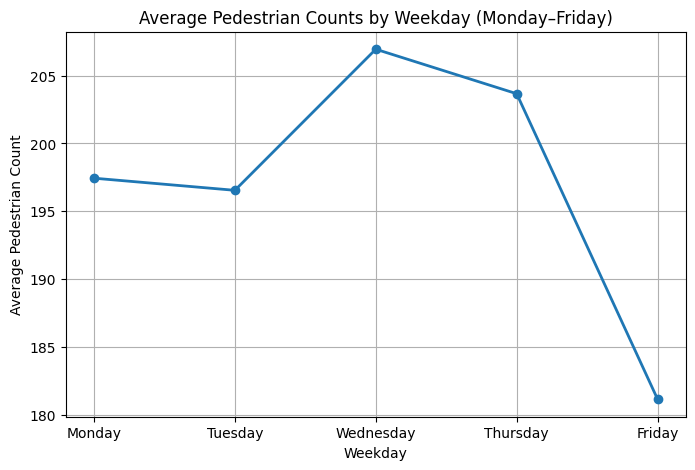

In [17]:
df = pd.read_csv("/content/sample_data/Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project_20251014.csv")

df["hour_beginning"] = pd.to_datetime(df["hour_beginning"], errors="coerce")
df["weekday"] = df["hour_beginning"].dt.day_name()
df["Pedestrians"] = pd.to_numeric(df["Pedestrians"], errors="coerce")

weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
df_weekdays = df[df["weekday"].isin(weekdays)]
df_weekday_counts = df_weekdays.groupby("weekday")["Pedestrians"].mean().reindex(weekdays)

plt.figure(figsize=(8, 5))
plt.plot(df_weekday_counts.index, df_weekday_counts.values, marker='o', linewidth=2)
plt.title("Average Pedestrian Counts by Weekday (Monday–Friday)")
plt.xlabel("Weekday")
plt.ylabel("Average Pedestrian Count")
plt.grid(True)
plt.show()

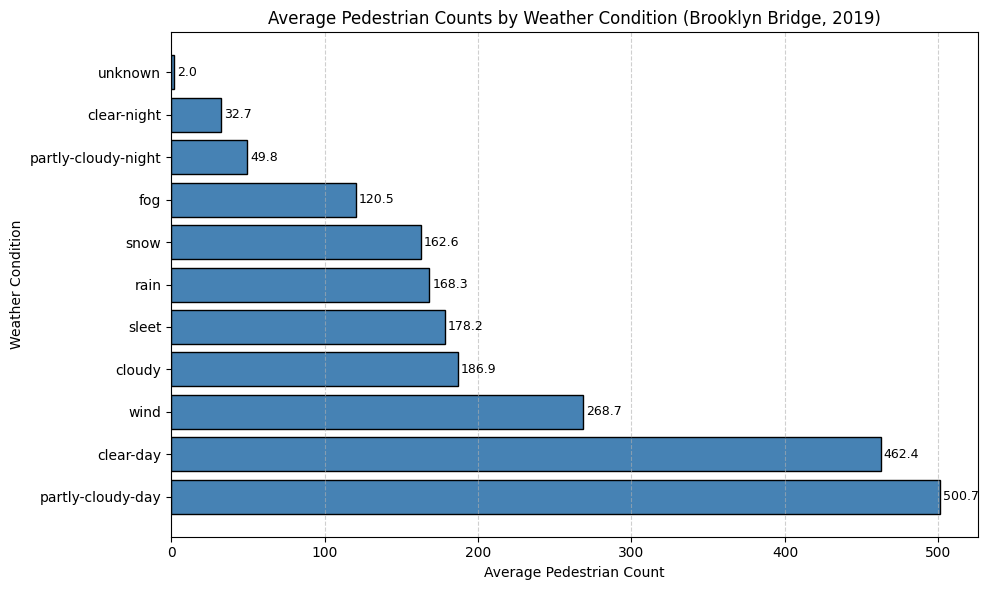

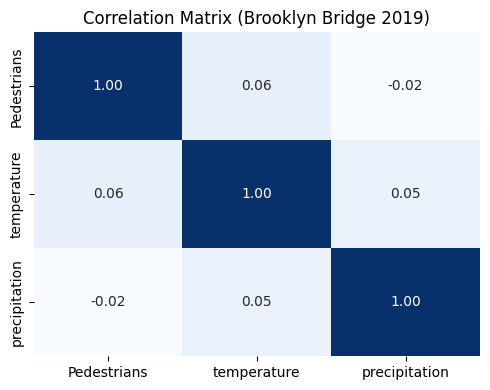

In [18]:
df_2019 = df[df["hour_beginning"].dt.year == 2019].copy()
df_2019["temperature"] = pd.to_numeric(df_2019["temperature"], errors="coerce")
df_2019["precipitation"] = pd.to_numeric(df_2019["precipitation"], errors="coerce")
df_2019["weather_summary"] = df_2019["weather_summary"].fillna("unknown")

weather_counts = df_2019.groupby("weather_summary")["Pedestrians"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(weather_counts.index, weather_counts.values, color="steelblue", edgecolor="black")
plt.title("Average Pedestrian Counts by Weather Condition (Brooklyn Bridge, 2019)")
plt.xlabel("Average Pedestrian Count")
plt.ylabel("Weather Condition")

for bar in bars:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.1f}", va='center', fontsize=9)

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

numeric_cols = ["Pedestrians", "temperature", "precipitation"]
corr_data = df_2019[numeric_cols].dropna()
corr_matrix = corr_data.corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f", cbar=False)
plt.title("Correlation Matrix (Brooklyn Bridge 2019)")
plt.tight_layout()
plt.show()

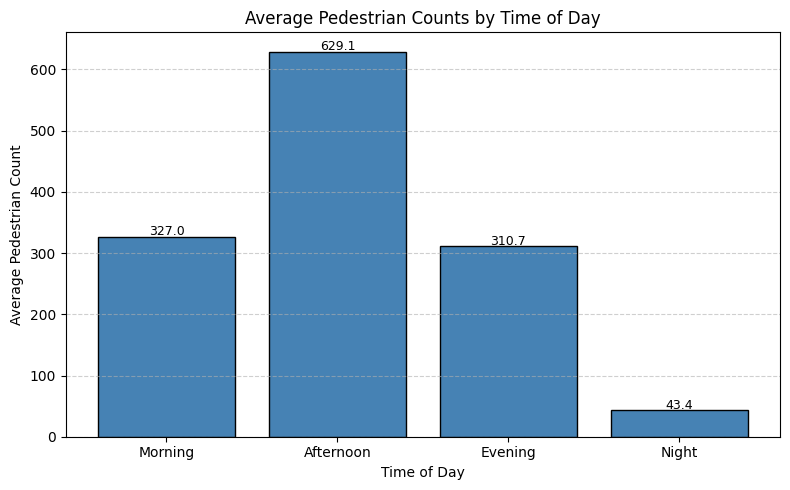

In [19]:
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df["hour"] = df["hour_beginning"].dt.hour
df["time_of_day"] = df["hour"].apply(categorize_time_of_day)

time_counts = df.groupby("time_of_day")["Pedestrians"].mean().reindex(["Morning", "Afternoon", "Evening", "Night"])

plt.figure(figsize=(8, 5))
bars = plt.bar(time_counts.index, time_counts.values, color="steelblue", edgecolor="black")
plt.title("Average Pedestrian Counts by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Pedestrian Count")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f"{bar.get_height():.1f}", ha='center', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()